In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
n = pd.read_csv('nodes_beer_beer.csv')[['id', 'modularity_class']]
beers = pd.read_csv('beers.csv', encoding='utf-8')[['id', 'name', 'style']]

In [3]:
df = pd.merge(n, beers, on=['id'], how='inner')
df = df[['id', 'style', 'modularity_class']]
df.head()

,id,style,modularity_class
0,30,Porter - American,7
1,102,Pale Ale - American,2
2,208,Scotch Ale / Wee Heavy,0
3,335,American Amber / Red Ale,2
4,879,English Pale Ale,0


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


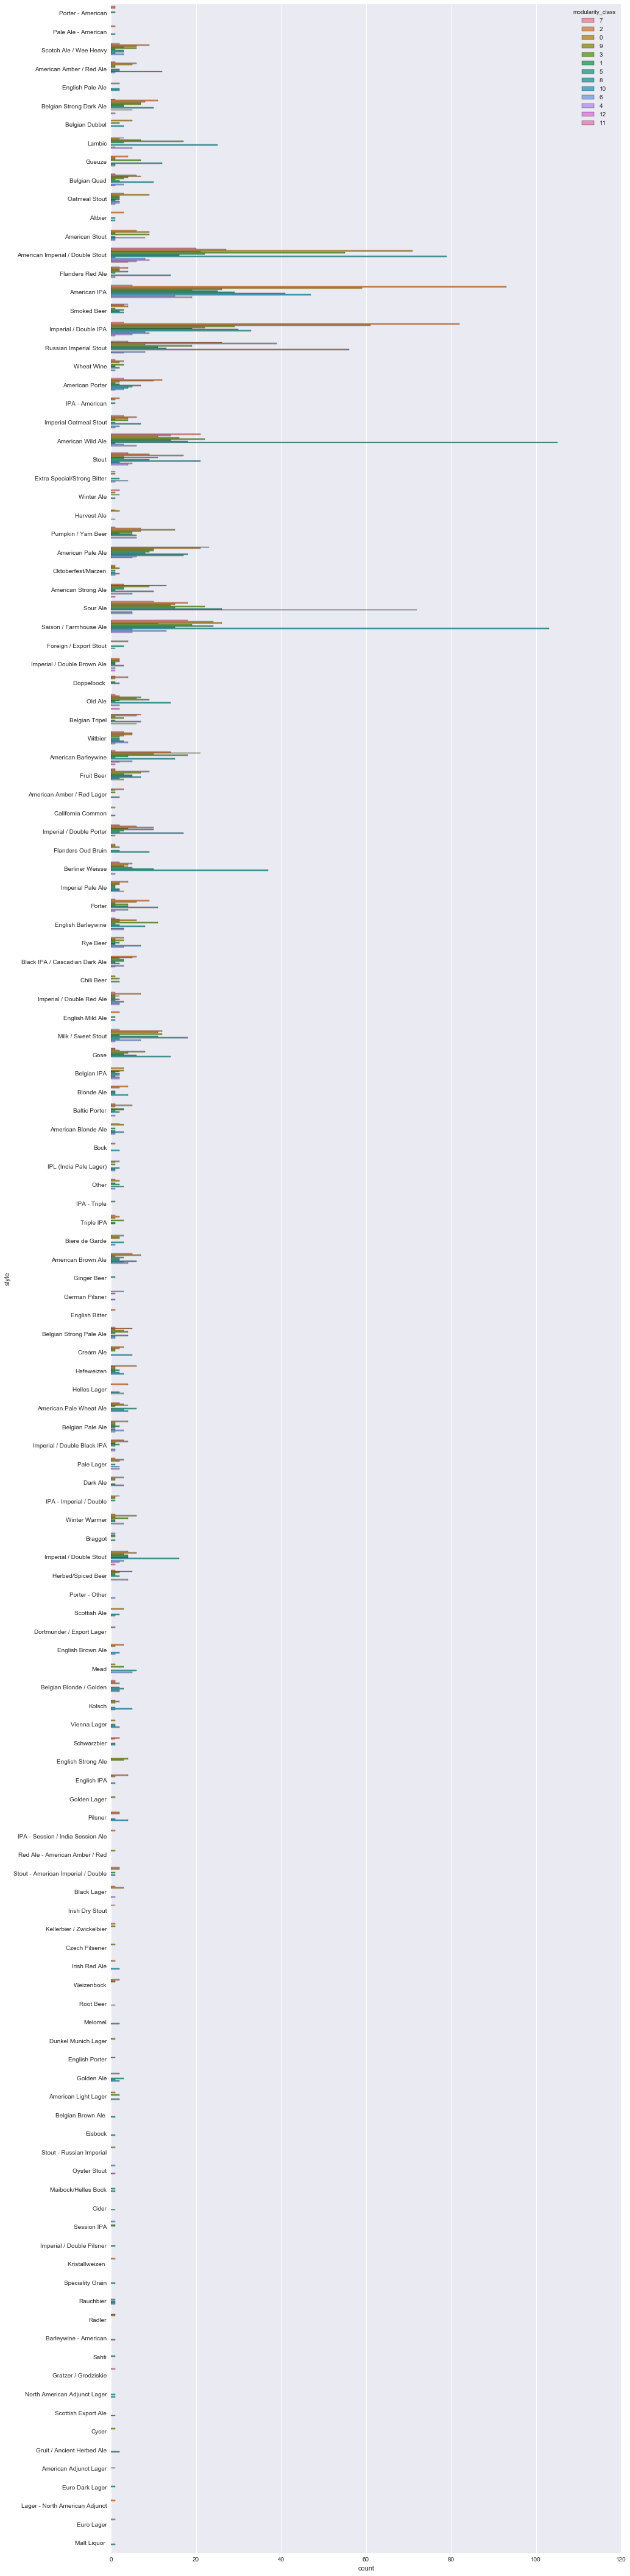

In [4]:
plt.figure(figsize=(15, 75))
sns.countplot(y='style', hue='modularity_class', data=df)
plt.show()

In [5]:
beers[beers['id'] == 13559]

,id,name,style
3099,13559,Zombie Dust,American Pale Ale


In [7]:
# count by mod_class styles
a = df.groupby(['modularity_class', 'style'], as_index=False).count()
# count by styles
b = df.groupby('style', as_index=False).count()
c = a.merge(b, on=['style'])
c = c.drop('modularity_class_y', axis=1)
c.columns = ['modularity_class', 'style', 'style_count', 'style_per']
c['style_per'] = c['style_count'] / c['style_per']
for mod_class in xrange(0, 13):
    print 'MOD CLASS: ' + str(mod_class)
    print
    print 'style count:'
    print c[c['modularity_class'] == mod_class].sort('style_count', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print 'percent of total style count:'
    print c[c['modularity_class'] == mod_class].sort('style_per', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print '----------------------'
    print

MOD CLASS: 0

style count:
                                style  style_count  style_per
51   American Imperial / Double Stout           71   0.209440
357             Imperial / Double IPA           61   0.201987
40                       American IPA           59   0.156085
510            Russian Imperial Stout           39   0.208556
529            Saison / Farmhouse Ale           26   0.098859
13                American Barleywine           21   0.228261
67                  American Pale Ale           21   0.165354
574                             Stout           17   0.193182
564                          Sour Ale           15   0.074257
498                Pumpkin / Yam Beer           15   0.277778

percent of total style count:
                              style  style_count  style_per
238       Dortmunder / Export Lager            1   1.000000
509  Red Ale - American Amber / Red            1   1.000000
209                     Black Lager            3   0.600000
554                 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
